# Dropping users based on average score
This time I will try to drop users based on an average score scale. This may help rid the system of users who have an overwhelming amount of negative reviews.

In [1]:
import numpy as np
import pandas as pd

from scipy import sparse
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('metacriticfortuning.csv', index_col='Unnamed: 0')

In [3]:
df.head()

,is_critic,reviewer_name,reviewer_score,url,title,norm_score,genre,reviewer_id
0,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade",0
1,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade",0
2,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade",0
3,1,GamingXP,81,15-days,15 Days (PC),8,"Adventure, General, Point-and-Click",0
4,1,GamingXP,81,15-days,15 Days (PC),8,"Adventure, General, Point-and-Click",0


In [4]:
df.shape

(221303, 8)

## Create a column called 'Avg Score' which is the average score of the user...

In [5]:
avg_df = df.groupby(['reviewer_name']).median().reset_index()
avg_df = avg_df.drop(['is_critic', 'reviewer_score', 'reviewer_id'], axis=1)

In [6]:
avg_df = avg_df.rename(columns={'norm_score': 'avg_score'})

In [7]:
avg_df.head()

,reviewer_name,avg_score
0,"""Harv'sNoBroofMine""Smith",1.0
1,$MOB$-DevilDoggSince96,10.0
2,'Airstrike'I,10.0
3,'Rockin!',2.0
4,(Anonymus),1.0


In [9]:
df = pd.merge(df, avg_df, on='reviewer_name')
df.head()

,is_critic,reviewer_name,reviewer_score,url,title,norm_score,genre,reviewer_id,avg_score
0,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade",0,8.0
1,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade",0,8.0
2,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade",0,8.0
3,1,GamingXP,81,15-days,15 Days (PC),8,"Adventure, General, Point-and-Click",0,8.0
4,1,GamingXP,81,15-days,15 Days (PC),8,"Adventure, General, Point-and-Click",0,8.0


## Now let's filter out reviewers with a median score less than 3!

In [11]:
df = df[df['avg_score'].values > 3]

In [12]:
df.shape # We didn't lose as many reviewers this time.

(193085, 9)

## We also want to keep only the users with 4 or more reviews...

In [13]:
df = df.groupby('reviewer_id').filter(lambda x: len(x) > 3)

In [74]:
#New Dataset has an average of 2.59 reviews per person...
print "average reviews per person:"
print np.mean(df.reviewer_id.value_counts())
print
#New Dataset has 221303 reviews...
print "length of dataframe:"
print len(df)
print
#New Dataset has 85371 reviewers...
print "top reviewers:"
print df.reviewer_id.value_counts()[:10]

average reviews per person:
19.6837412871

length of dataframe:
121429

top reviewers:
25     2446
22     2417
4      2308
18     1365
66     1130
24     1109
1      1027
47     1025
28      965
134     954
Name: reviewer_id, dtype: int64


In [16]:
df.head()

,is_critic,reviewer_name,reviewer_score,url,title,norm_score,genre,reviewer_id,avg_score
0,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade",0,8.0
1,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade",0,8.0
2,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade",0,8.0
3,1,GamingXP,81,15-days,15 Days (PC),8,"Adventure, General, Point-and-Click",0,8.0
4,1,GamingXP,81,15-days,15 Days (PC),8,"Adventure, General, Point-and-Click",0,8.0


## Need to fix the index and reviewer_id since they are now missing values...
When we dropped some reviews and reviewrs we need to re-index the dataframe.

In [17]:
df = df.reset_index()
df = df.drop(['index'], axis=1)

In [18]:
df.head() #Our dataframe is looking nice and orderly again...

,is_critic,reviewer_name,reviewer_score,url,title,norm_score,genre,reviewer_id,avg_score
0,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade",0,8.0
1,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade",0,8.0
2,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade",0,8.0
3,1,GamingXP,81,15-days,15 Days (PC),8,"Adventure, General, Point-and-Click",0,8.0
4,1,GamingXP,81,15-days,15 Days (PC),8,"Adventure, General, Point-and-Click",0,8.0


In [19]:
#Build a df to make a new reviewer_id so we don't have any empty spaces...
revName = pd.DataFrame(df['reviewer_name'].unique())

revName.columns = ['reviewer_name']
revName['reviewer_id_fixt'] = range(len(revName))

In [20]:
revName.head()

,reviewer_name,reviewer_id_fixt
0,GamingXP,0
1,LEVEL (Czech Republic),1
2,PC Master (Greece),2
3,Riot Pixels,3
4,PC Gamer,4


In [21]:
revName.tail()

,reviewer_name,reviewer_id_fixt
6164,GuilhermeLeme13,6164
6165,Andrea,6165
6166,skulltulainahat,6166
6167,mose,6167
6168,Dallaswithad,6168


In [22]:
# Merge the new list to the DF, drop and rename the old reviewer id column.
df = pd.merge(df, revName, on='reviewer_name')
df = df.drop(['reviewer_id'], axis=1)
df = df.rename(columns={'reviewer_id_fixt': 'reviewer_id'})

In [23]:
# I'm sure there is a more effecient way to do this, but I got the desired results without an issue.
df.head(3)

,is_critic,reviewer_name,reviewer_score,url,title,norm_score,genre,avg_score,reviewer_id
0,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade",8.0,0
1,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade",8.0,0
2,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade",8.0,0


## After trimming off the reviewers..

In [24]:
df.norm_score.value_counts(sort=False)

0      2408
1      1307
2      1791
3      2811
4      4834
5      7388
6     11892
7     19981
8     29834
9     24678
10    14505
Name: norm_score, dtype: int64

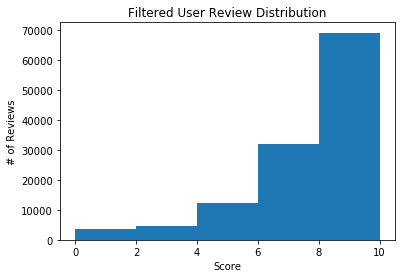

In [25]:
plt.hist(df.norm_score, bins=5)
plt.title("Filtered User Review Distribution")
plt.xlabel("Score")
plt.ylabel("# of Reviews")

# Setting up a pivot table

In [26]:
pivot = df.pivot_table(index='reviewer_id', columns='title', values='norm_score')
pivot.shape

(6169, 4457)

In [27]:
pivot.fillna(0).values
pivot.shape

(6169, 4457)

In [28]:
pivot.head()

title,007 Legends (PC),007: NightFire (PC),007: Quantum of Solace (PC),0RBITALIS (PC),10 Second Ninja (PC),"10,000,000 (PC)",1001 Spikes (PC),12 is Better Than 6 (PC),140 (PC),15 Days (PC),...,Zoo Tycoon: Marine Mania (PC),Zuma's Revenge! (PC),continue?9876543210 (PC),iRacing (PC),imprint-X (PC),inMomentum (PC),kill.switch (PC),nail'd (PC),rymdkapsel (PC),theHunter: Call of the Wild (PC)
reviewer_id,,,,,,,,,,,,,,,,,,,,,
0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
1,3.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,6.0,8.0,NaN
2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,NaN,7.0,8.0,NaN,6.0


In [29]:
A = 3765 #The reviewer id that we want...
print df['reviewer_name'].where(df['reviewer_id'] == A).value_counts().index.values # get the name of "A" (hacky)
print
print pivot.iloc[A].dropna() #These are all reviews from reviewer_id "A"

['sgy0003']

title
Battlefield 1 (PC)                                           8.0
Battlefield Hardline (PC)                                    5.0
Dishonored (PC)                                             10.0
Dragon Age: Inquisition (PC)                                 8.0
Mirror's Edge (PC)                                          10.0
The Walking Dead: Michonne - Episode 1: In Too Deep (PC)     6.0
Valiant Hearts: The Great War (PC)                          10.0
Name: 3765, dtype: float64


# ----------------------------------------------------------------------------------------

In [30]:
pivotsparse = sparse.csc_matrix(pivot.fillna(0).values)

In [31]:
pivot.fillna(0).shape

(6169, 4457)

In [32]:
print pivotsparse[800] #Scipy Sparse
print pivot.iloc[800].dropna()

  (0, 110)	10.0
  (0, 441)	8.0
  (0, 1938)	9.0
  (0, 2171)	10.0
  (0, 2861)	10.0
  (0, 3119)	10.0
  (0, 4032)	6.0
title
Alan Wake (PC)                          10.0
BioShock Infinite (PC)                   8.0
Hunted: The Demon's Forge (PC)           9.0
LIMBO (PC)                              10.0
Papers, Please (PC)                     10.0
Resident Evil 4 (PC)                    10.0
Tiny & Big: Grandpa's Leftovers (PC)     6.0
Name: 800, dtype: float64


## Finding the User for tuning...

In [67]:
# gotta find the user...
name = 'PStakhiv'
df[df['reviewer_name'].str.contains(name)]

,is_critic,reviewer_name,reviewer_score,url,title,norm_score,genre,avg_score,reviewer_id
110661,0,PStakhiv,9,bioshock-infinite,BioShock Infinite (PC),9,"Action, Shooter, First-Person, Sci-Fi, Arcade",8.5,4240
110662,0,PStakhiv,7,dead-space-3,Dead Space 3 (PC),7,"Action, Action Adventure, Shooter, Linear, Thi...",8.5,4240
110663,0,PStakhiv,10,deus-ex-human-revolution,Deus Ex: Human Revolution (PC),10,"Action, Action Adventure, Shooter, Sci-Fi, Gen...",8.5,4240
110664,0,PStakhiv,8,dishonored,Dishonored (PC),8,"Action Adventure, Modern, General, Modern",8.5,4240
110665,0,PStakhiv,9,dragon-age-origins,Dragon Age: Origins (PC),9,"Role-Playing, PC-style RPG, Western-Style",8.5,4240
110666,0,PStakhiv,9,far-cry-3,Far Cry 3 (PC),9,"Action, Shooter, First-Person, Modern, Arcade",8.5,4240
110667,0,PStakhiv,7,kingdoms-of-amalur-reckoning,Kingdoms of Amalur: Reckoning (PC),7,"Role-Playing, PC-style RPG, Action RPG",8.5,4240
110668,0,PStakhiv,9,mass-effect,Mass Effect (PC),9,"Role-Playing, Action RPG, Console-style Japane...",8.5,4240
110669,0,PStakhiv,10,mass-effect-2,Mass Effect 2 (PC),10,"Role-Playing, Action RPG, RPG",8.5,4240
110670,0,PStakhiv,9,mass-effect-2-lair-of-the-shadow-broker,Mass Effect 2: Lair of the Shadow Broker (PC),9,"Role-Playing, Action RPG, RPG",8.5,4240


## Running the Model

In [68]:
# I set my 'X' value as my pivot table of the data.
# I am planning to feed the 'y' or user input into the dataframe to be saved among the others.
# This is so I can collect new reviews to be fed into the model.

X = pivotsparse
nbrs = NearestNeighbors(n_neighbors=6).fit(X)
distances, indices = nbrs.kneighbors(pivotsparse[4240]) #Input the desired user id here
print distances
print "-"*20
print indices

[[  0.          33.54101966  33.80828301  34.23448554  34.35112807
   34.35112807]]
--------------------
[[4240 4793 4198 1851 3749 3813]]


## Cleaning up the output

In [69]:
#indices are displayed as a list within a list
print indices[0]
print indices[0][0]
print indices[0][2]

[4240 4793 4198 1851 3749 3813]
4240
4198


In [70]:
sample_reviewer = indices[0][0]
suggested_reviewers = indices[0][1:]

print sample_reviewer
print suggested_reviewers

4240
[4793 4198 1851 3749 3813]


In [71]:
# Make a function to filter out titles already listed in our source reviewer...
def user_suggestions(ur, sr):
    usrTitles = []
    for t in pivot.iloc[ur].dropna().index:
        usrTitles.append(t)
    sugTitles = []
    for rec in sr:
        for t in pivot.iloc[rec].dropna().index:
            sugTitles.append(t)

    recommendations = [x for x in sugTitles if x not in usrTitles]

    return recommendations 

In [72]:
print 'Here are your Reviews:'
print "-"*40
print pivot.iloc[sample_reviewer].dropna().sort_values(ascending=False)
print
print "*"*40
print "Here are recommendations from similar reviewers..."
print "*"*40
print
for i in user_suggestions(sample_reviewer, suggested_reviewers):
    print i

Here are your Reviews:
----------------------------------------
title
Deus Ex: Human Revolution (PC)                    10.0
Mass Effect 2 (PC)                                10.0
Mass Effect 2: Lair of the Shadow Broker (PC)      9.0
Metro: Last Light (PC)                             9.0
Dragon Age: Origins (PC)                           9.0
Far Cry 3 (PC)                                     9.0
Mass Effect (PC)                                   9.0
BioShock Infinite (PC)                             9.0
Portal (PC)                                        9.0
The Elder Scrolls V: Skyrim (PC)                   9.0
Mass Effect 3 (PC)                                 8.0
The Walking Dead: A Telltale Games Series (PC)     8.0
Pro Evolution Soccer 2014 (PC)                     8.0
The Elder Scrolls IV: Oblivion (PC)                8.0
Dishonored (PC)                                    8.0
Thief (PC)                                         8.0
Mass Effect 3: Citadel (PC)                       

### Checking the results...
I've tested about 10-20 different entries, and we seem to be getting at least the same or better results than with the dropped reviewers from before. This is good because we get to keep many more reviewers on hand. For the next section I'll build a user input that allows people to feed in their own scores.